# Исследование объявлений о продаже квартир

В распоряжении данные сервиса Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определить рыночную стоимость объектов недвижимости.   

**Задача**: установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования**: Определить какие факторы больше всего влияют на общую (полную) стоимость объекта.

Для этого будет оценена связь цены и параметров ниже:
- общая площадь;
- жилая площадь;
- площадь кухни;
- количество комнат;
- тип этажа квартиры («первый», «последний», «другой»);
- расстояние до центра города;
- день, месяц и год публикации объявления.

Исследование пройдёт в 4 этапа:

Обзор данных.  
Предобработка данных.  
Добавление дополнительных расчетов.  
Решение задачи исследования


### Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [2]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


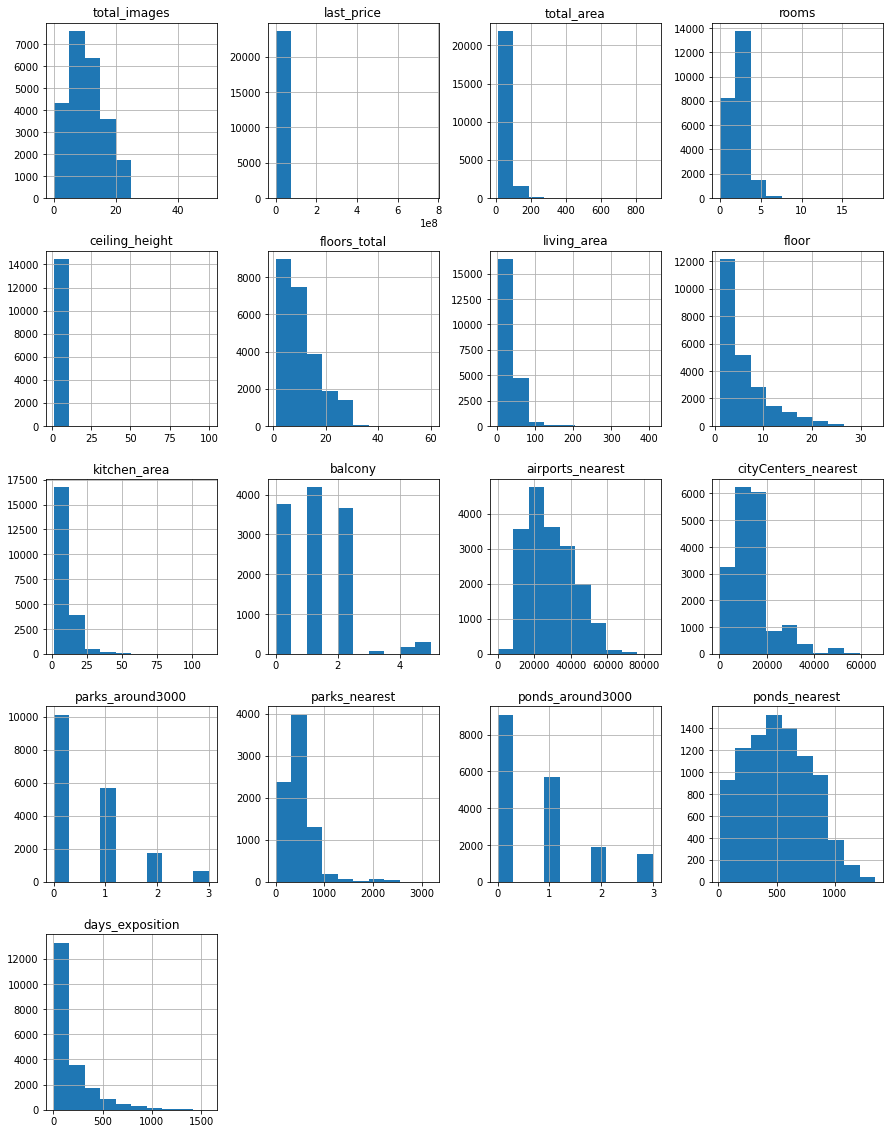

In [3]:
data.hist(figsize=(15, 20));

### Предобработка данных

In [4]:
#Определим в каких столбцах есть пропуски.
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


In [6]:
#Заполним пропущенные значения там, где это возможно. 
#Найдем столбцы, в которых нужно изменить тип данных.
#Преобразуем тип данных в выбранных столбцах.

data['balcony'] = data['balcony'].fillna(0).astype('int')
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')
data['is_apartment'] = data['is_apartment'].fillna(value = False)

In [7]:
#проверим замену пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

В данных есть пропущенные значения в столбцах. 
Пропуски могут быть следствием отсутствия данной характеристики для квартиры - в этом случае их можно заменить на нули. Например, пропуски в столбцах "Балкон" означают отсутсвие балконов в квартире.
Число пропусков в столбцах "число парков в радиусе 3 км" и "число водоёмов в радиусе 3 км" идентично т.к. чаще всего эти области совмещены, пропуски могут свидетельствовать об отсутсвии данных характеристик для квартиры - значения также можно заменить на нули.
Заменим тип данных на целочисленный в столбцах выше.
Пропуски в столбце "апартаменты" также могут свидетельствовать об отсутствии данной характеристики для квартиры, тип данных приведен к булевому типу для дальнейшей обработки.

In [8]:
#Заменим строчный тип данных на datetime в столбце с датой первой публикации 2015-07-24T00:00:00
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

In [9]:
#сразу заполним пропуски в столбце медианным значением
data = data.sort_values(by = 'first_day_exposition', ascending = True)
data['first_day_exposition'] = data['first_day_exposition'].fillna(data['first_day_exposition'].median())

In [10]:
data['last_price'] = data['last_price'].astype('int')

In [11]:
#Проверим где еще требуется замена типа данных.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 10132 to 15072
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony     

Типы данных после замены готовы для дальнейшего анализа.

In [12]:
#Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты. 
data['locality_name'].unique()

array(['Санкт-Петербург', 'деревня Кудрово', 'Подпорожье', 'Коммунар',
       'поселок Красная Долина', 'Всеволожск', nan, 'посёлок Молодёжное',
       'Пушкин', 'Петергоф', 'Ломоносов',
       'городской поселок Большая Ижора',
       'поселок городского типа Вырица', 'Колпино', 'Шлиссельбург',
       'Сертолово', 'деревня Новое Девяткино', 'деревня Ваганово',
       'Светогорск', 'деревня Калитино', 'деревня Кипень',
       'посёлок Мурино', 'посёлок Парголово', 'Сестрорецк', 'Выборг',
       'Тосно', 'Лодейное Поле', 'поселок городского типа Рахья',
       'деревня Старая', 'поселок Бугры',
       'посёлок городского типа Лебяжье', 'Кингисепп', 'Гатчина',
       'Павловск', 'Красное Село', 'поселок Севастьяново', 'Каменногорск',
       'поселок Мурино', 'Отрадное', 'посёлок Тельмана',
       'поселок Романовка', 'поселок городского типа Дубровка', 'Сланцы',
       'поселок Углово', 'Кронштадт', 'деревня Вартемяги',
       'деревня Нурма', 'Волхов', 'посёлок Шушары', 'Приозерск',
   

In [13]:
#уберем неявные дубликаты и проверим кол-во после замены
data['locality_name'] = data['locality_name'].str.replace('ё','е')
data['locality_name'] = data['locality_name'].replace('поселок Рябово', 'поселок городского типа Рябово')
data['locality_name'] = data['locality_name'].replace('поселок Мурино', 'Мурино')

In [14]:
#пропуски географии невозможно заполнить, дополним строки
data ['locality_name'] = data ['locality_name'].fillna('не указан')

Для исключения задвоений меняем букву "ё" на "е" в названиях локаций.
Локации с одинаковым названием, но относящиеся к разным типам поселений не могут быть объединены, например горор Кингисе́пп и поселок Кингисе́ппский, часть имеет ошибки в типах поселений: поселок Мурино заменен на город, поселок Рябово  - на поселок городского типа.

In [15]:
#Найдите и устраните редкие и выбивающиеся значения. 
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.12,   2.64,   3.  ,   2.73,   2.8 ,   2.77,
         2.55,   3.1 ,   2.75,   2.5 ,   3.3 ,   2.85,   3.4 ,   2.6 ,
         2.52,   2.62,   3.5 ,   3.2 ,   4.4 ,   2.53,   3.02,   2.95,
         2.9 ,   3.6 ,   2.87,   2.82,   5.6 ,   3.25,   3.55,   3.05,
         3.46,   3.9 ,   3.8 ,   3.69,   2.83,   3.45,   4.  ,   3.08,
         2.66,   3.15,   2.84,   2.63,   2.65,   2.58,   2.54,   2.81,
         2.76,   2.78,   2.57,   3.17,   2.51,   3.84,   3.75,   2.96,
         5.2 ,   8.  ,   2.67,   3.23,   3.7 ,   2.92,   2.79,   3.11,
         3.85,   2.71,   3.37,   2.72,   2.74,   3.54,   2.56,   3.27,
         2.88,   3.32,   4.1 ,   2.68,  25.  ,   3.16,   3.36,   2.48,
         4.45,   3.35,   3.78,   2.3 ,   3.13,   3.04,   3.28,   4.8 ,
         3.38,   3.22,   3.58,   2.59,   2.46,   3.57,   2.89,   3.66,
         3.01,   2.4 ,   2.97,   3.52,   2.25,   4.2 ,   3.44,   2.45,
         3.26,   3.34,   3.18,   3.65,   3.67,   3.48,   2.93,   3.06,
      

In [16]:
#заменим значения схожие с ошибкой внесения данных
data['ceiling_height'] = data['ceiling_height'].replace('25.  ', '2.50')
data['ceiling_height'] = data['ceiling_height'].replace('32.  ', '3.20')
data['ceiling_height'] = data['ceiling_height'].replace('27.  ', '2.70')
data['ceiling_height'] = data['ceiling_height'].replace('24.  ', '2.40')
data['ceiling_height'] = data['ceiling_height'].replace('26.  ', '2.60')
data['ceiling_height'] = data['ceiling_height'].replace('20.  ', '2.00')
data['ceiling_height'] = data['ceiling_height'].replace('27.5 ', '2.75')

In [17]:
#посчитаем долю пропусков
data['ceiling_height'].isna().sum() / data['ceiling_height'].count()

0.6339630446773304

Пропуски при внесении высоты потолка составляют 63% данных и могут существенно исказить результат анализа в случае их удаления. Заполним пропуски медианным значением

In [18]:
data['ceiling_height'].isna().sum()

9195

In [19]:
#заполним пропуски медианным значением
data = data.sort_values(by = 'ceiling_height', ascending = True)
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [20]:
#for locality_name in data['locality_name'].unique():
    #median = data.loc[data['locality_name'] == locality_name, 'ceiling_height'].median()
    #data.loc[(data['ceiling_height'].isna()) & (data['locality_name'] == locality_name), 'ceiling_height'] = median
    
#data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()



<function matplotlib.pyplot.show(close=None, block=None)>

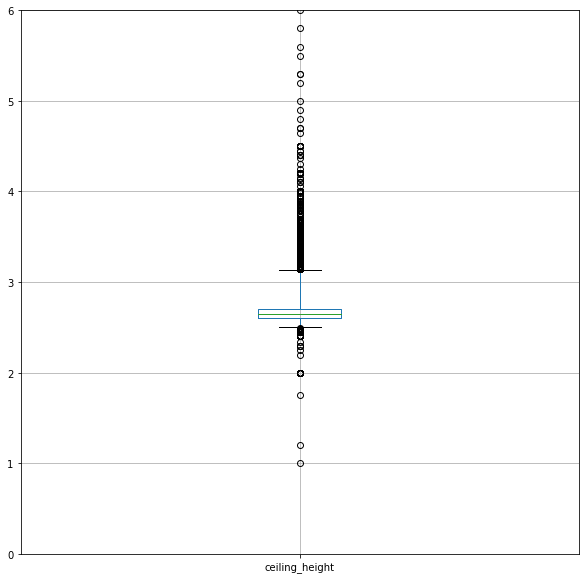

In [21]:
axes = data.boxplot(column = 'ceiling_height',figsize=(10,10), whis=[5,95], return_type='axes')
axes.set_ylim(0,6)
plt.show

In [22]:
#значения не поддающиеся корректировке, такие выбросы высоты потолка ниже 2 м и выше 4 м и пропуски, перезапишем
data = data.sort_values(by = 'ceiling_height', ascending = True)
data.loc[(data['ceiling_height'] < 2) | (data['ceiling_height'] > 4), 'ceiling_height']\
= data['ceiling_height'].median()

In [23]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.693220
std          0.204351
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

После обработки данных, минимальные и максимальные значения высоты потолка приблизились к реальным. 

В столбце с жилой площадью есть пропуски, а также выбросы, которые могут быть ошибками - например жилая площадь 2 м кв и большие помещения более 400 м кв.
Для начала заполним пропуски медианым значением, затем обработаем выбросы.  
Есть высокая корреляция кол-ва комнат и жилой площади. Заполним пропуски в столбце с жилой площадью медианным значением в соответствии с кол-вом комнат.  
Также есть корреляция жилой и общей площади, заполним пропуски аналогичным образом.

In [24]:
data['living_area'].corr(data['rooms'])

0.8459774567888746

In [25]:
data['living_area'].corr(data['total_area'])

0.9395373338721491

In [26]:
data['kitchen_area'].corr(data['total_area'])

0.6091211711198314

In [27]:
median_living_area = data.groupby('rooms')['living_area'].median()
for value in median_living_area.index:
    data.loc[(data['rooms'] == value) & (data['living_area'].isna()),'living_area'] = median_living_area[value]

In [28]:
median_total_area = data.groupby('living_area')['total_area'].median()
for value in median_total_area.index:
    data.loc[(data['living_area'] == value) & (data['total_area'].isna()),'total_area'] = median_total_area[value]

In [29]:
median_kitchen_area = data.groupby('total_area')['kitchen_area'].median()
for value in median_kitchen_area.index:
    data.loc[(data['total_area'] == value) & (data['kitchen_area'].isna()),'kitchen_area'] = median_kitchen_area[value]

In [30]:
data['living_area'].describe()

count    23699.000000
mean        34.321982
std         21.700627
min          2.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64

In [31]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [32]:
data['kitchen_area'].describe()

count    23494.000000
mean        10.457529
std          5.782501
min          1.300000
25%          7.000000
50%          9.000000
75%         11.810000
max        112.000000
Name: kitchen_area, dtype: float64

Согласно учетным нормам, минимальный размер площади жилого помещения на человека в Санкт-Петербурге - 9 м кв, удалим выбросы ниже этой границы.
Верхние значения ограничим, в соответсвии с "хвостами" границей отклонений.

In [33]:
data = data.loc[(data['living_area'] >= 9)&(data['living_area'] <= 125)]
data = data.loc[data['total_area'] <= 200]
data = data.loc[data['kitchen_area'] <= 40]

Пропуски в столбце этажей дома заполним в соответсвии с этажом квартиры т.к. корреляция достаточно высокая

In [34]:
data['floors_total'].corr(data['floor'])

0.6769000676250776

In [35]:
median_floor = data.groupby('floor')['floors_total'].median()
for value in median_floor.index:
    data.loc[(data['floor'] == value) & (data['floors_total'].isna()),'floors_total'] = median_floor[value]

In [36]:
data['floors_total'] = data['floors_total'].astype('int')

Пропуски в столбцах удаленности от аэропорта, центра города, парков и водоемой, заполним медианным значением, группируя объекты по геолокации.

In [37]:
median_airports_geo = data.groupby('locality_name')['airports_nearest'].median()
for value in median_airports_geo.index:
    data.loc[(data['locality_name'] == value) & (data['airports_nearest'].isna()),'airports_nearest'] = median_airports_geo[value]

In [38]:
median_cityCenters_geo = data.groupby('locality_name')['cityCenters_nearest'].median()
for value in median_cityCenters_geo.index:
    data.loc[(data['locality_name'] == value) & (data['cityCenters_nearest'].isna()),'cityCenters_nearest'] = median_cityCenters_geo[value]

In [39]:
median_parks_geo = data.groupby('locality_name')['parks_nearest'].median()
for value in median_parks_geo.index:
    data.loc[(data['locality_name'] == value) & (data['parks_nearest'].isna()),'parks_nearest'] = median_parks_geo[value]

In [40]:
median_ponds_geo = data.groupby('locality_name')['ponds_nearest'].median()
for value in median_ponds_geo.index:
    data.loc[(data['locality_name'] == value) & (data['ponds_nearest'].isna()),'ponds_nearest'] = median_ponds_geo[value]

In [41]:
#проверим замену пропусков
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23136 entries, 22590 to 22869
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23136 non-null  int64         
 1   last_price            23136 non-null  int64         
 2   total_area            23136 non-null  float64       
 3   first_day_exposition  23136 non-null  datetime64[ns]
 4   rooms                 23136 non-null  int64         
 5   ceiling_height        23136 non-null  float64       
 6   floors_total          23136 non-null  int64         
 7   living_area           23136 non-null  float64       
 8   floor                 23136 non-null  int64         
 9   is_apartment          23136 non-null  bool          
 10  studio                23136 non-null  bool          
 11  open_plan             23136 non-null  bool          
 12  kitchen_area          23136 non-null  float64       
 13  balcony     

In [42]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        4809
cityCenters_nearest     4809
parks_around3000           0
parks_nearest           5914
ponds_around3000           0
ponds_nearest           4893
days_exposition         3079
dtype: int64

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Отсутствует проверка на дубликаты. Поправишь, пожалуйста?
</div>

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>Комментарии студента:</b></u></font>
    <br />
    <font color='4682B4'>Да, спасибо, ниже добавила проверку</font>
</div>

In [43]:
display(data.duplicated().sum())

0

Дубликаты в данных отсутствуют, можем переходить к следующему этапу анализа.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Проверка на дубликаты - основа предобработки данных
</div>

### Посчитайте и добавьте в таблицу новые столбцы

In [44]:
#добавим цену одного квадратного метра
data['price_1sqr_m'] = data['last_price'] / data['total_area']
data['price_1sqr_m'] = data['price_1sqr_m'].astype('int')

In [45]:
#добавим день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['day_of_exposition'] = data['first_day_exposition'].dt.dayofweek

In [46]:
#месяц публикации объявления
data['month_of_exposition'] = data['first_day_exposition'].dt.month

In [47]:
#год публикации объявления
data['year_of_exposition'] = data['first_day_exposition'].dt.year

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Совет: обычно в датафреймах содержатся данные за несколько лет. Важно выбрать корректный метод для вычленения месяца, иначе месяца разных годов могут стать одним месяцем. Обрати внимание на метод astype('datetime64[M]'). Для его использования не нужно обращаться к pd.DatetimeIndex. 
</div>

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>Комментарии студента:</b></u></font>
    <br />
    <font color='4682B4'>Не совсем поняла комментарий: у нас ведь добавляются столбцы отдельно год и месяц, то есть в комбинации можно будет понять к какому году что относится, а по месяцам в целом посмотреть сезональность. Или имеется ввиду, что данные схлопнутся и неудобно будет смотреть изменение сезональности по годам, то есть месяц добавить в формате, например,"2019_01", "2019_02", чтобы при построении графика они шли отдельно? Если второй вариант, можешь, пожалуйста, подсказать, где посмотреть про метод, не нашла понятных примеров.</font>
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

 Код выглядит так:
    
        df['first_day_exposition'].dt.date #приводим к временному формату
        df['first_day_exposition'].astype('datetime64[M]') 
    
Если года разные, то в новой колонке месяца у тебя отобразится первый день месяца ('2019-05-01')
</div>

In [48]:
#тип этажа квартиры (значения — «первый», «последний», «другой»)
def floor_type(fl):
    if fl['floor'] == 1:
        return 'первый'
    if fl ['floor'] == fl['floors_total']:
        return 'последний'
    return 'другой'
data['type_of_floor'] = data[['floor', 'floors_total']].apply(floor_type, axis = 1)
data['type_of_floor'] = data['type_of_floor']

In [49]:
#расстояние до центра города в километрах (в км и округлено до целых значений)
data['cityCenters_km'] = data['cityCenters_nearest'] / 1000
data['cityCenters_km'] = data['cityCenters_km'].round()

In [50]:
#проверка добавленных столбцов
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1sqr_m,day_of_exposition,month_of_exposition,year_of_exposition,type_of_floor,cityCenters_km
22590,16,6000000,55.00,2018-10-31,2,2.65,12,32.4,7,False,...,293.0,2,289.0,13.0,109090,2,10,2018,другой,14.0
5712,5,1500000,42.80,2017-08-14,2,2.65,2,27.5,1,False,...,NaN,0,NaN,248.0,35046,0,8,2017,первый,NaN
16934,5,4100000,40.00,2017-10-17,1,2.65,37,17.4,5,False,...,463.0,3,80.0,71.0,102500,1,10,2017,другой,20.0
16884,0,1500000,33.00,2018-10-03,1,2.00,5,20.0,5,False,...,NaN,0,NaN,6.0,45454,2,10,2018,последний,NaN
4212,1,2120000,35.43,2017-12-18,1,2.00,18,16.6,9,False,...,NaN,0,NaN,36.0,59836,0,12,2017,другой,NaN
11352,4,3300000,36.00,2017-06-18,1,2.00,17,15.2,12,False,...,NaN,0,NaN,53.0,91666,6,6,2017,другой,27.0
19329,5,1700000,40.00,2018-07-15,2,2.00,9,30.5,8,False,...,NaN,0,NaN,45.0,42500,6,7,2018,другой,NaN
20520,9,3600000,38.00,2018-07-05,1,2.00,12,15.0,9,False,...,NaN,0,NaN,62.0,94736,3,7,2018,другой,NaN
2572,4,2400000,62.00,2018-12-27,3,2.00,5,40.0,4,False,...,NaN,0,NaN,NaN,38709,3,12,2018,другой,NaN
22960,17,2300000,53.60,2018-10-18,2,2.00,2,19.0,1,False,...,NaN,0,NaN,NaN,42910,3,10,2018,первый,NaN


### Проведем исследовательский анализ данных

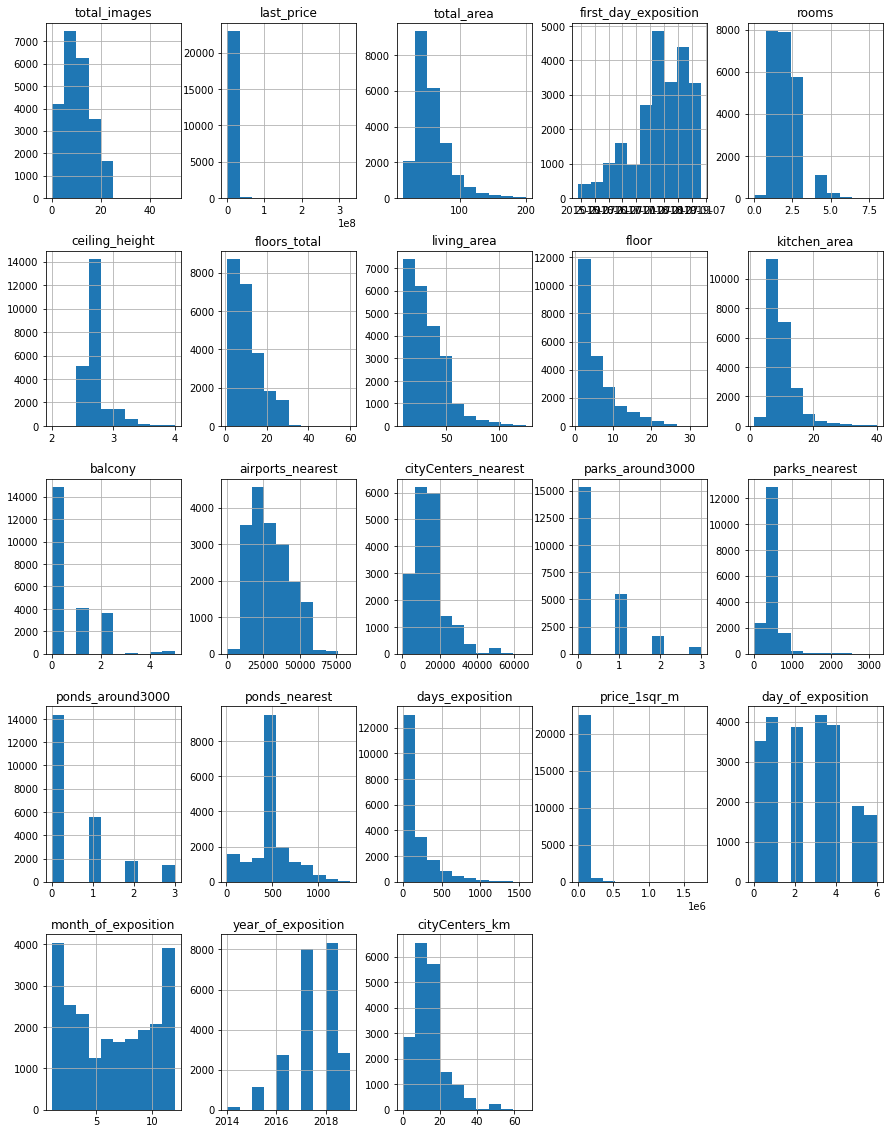

In [51]:
data.hist(figsize=(15, 20));

Предварительный анализ полученных данных:

**количество комнат**: преимущественно в продаже находились 1-2х комнатные квартиры, но при этом также выделяется сегмент 4х комнатных квартир;  
**высота потолков**: средняя высота потолков не превышает 3х метров  
**этаж квартиры**: больше предложений было квартир с 1-го по 5ый этаж, так как достаточно большой объем жилого фонда занимают именно 5-ти этажные дома, но также встречаются квартиры с более высоких этажей - вплотьт до 30, их кол-во плавно снижается по мере увеличения этажа;  
**общее количество этажей в доме**: большой объем жилого фонда занимают именно 5-ти и 10-ти этажные дома;  
**расстояние до ближайшего парка в метрах**: средняя удаленность до парка 500 м;  
**день и месяц публикации объявления**: Большая часть публикаций объявлений приходится на будние дни. Декабрь и Январь - сезонные пики по кол-ву объявлений, с мая по август наблюдается более низкий сезон, тем не менее объем объявлений все равно сохраняется.

Рассмотрим подробнее следующие параметры: 
- last_price
- price_1sqr_m
- total_area
- living_area
- kitchen_area
- first_day_exposition
- airports_nearest
- cityCenters_nearest

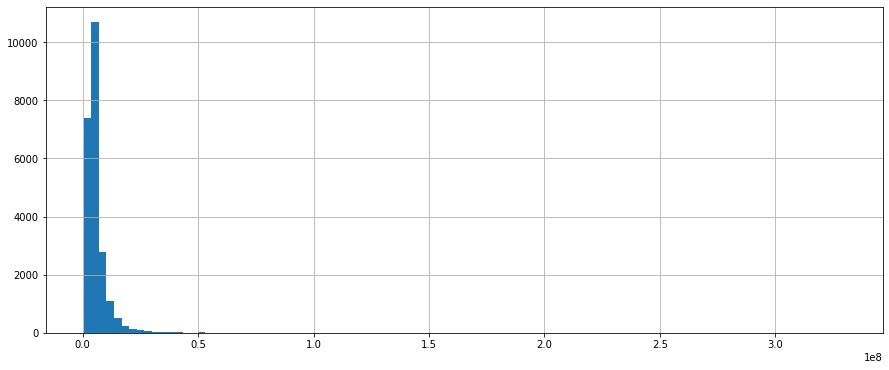

In [52]:
data['last_price'].hist(bins = 100, figsize=(15, 6));

In [53]:
data['last_price'].describe()

count    2.313600e+04
mean     5.916562e+06
std      5.823602e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.650000e+06
max      3.300000e+08
Name: last_price, dtype: float64

**цена объекта**: средняя стоимость квартир 5,9 млн руб

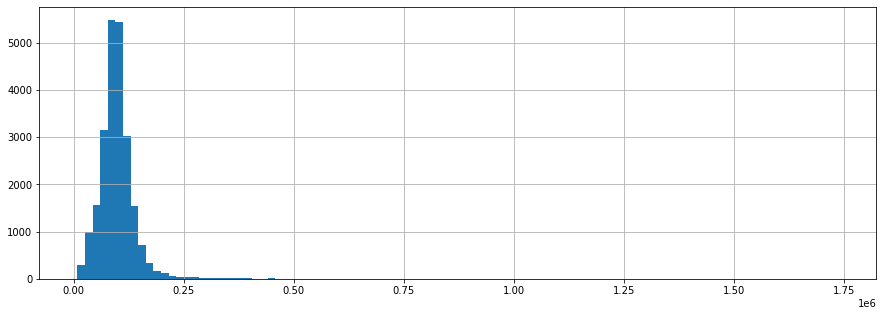

In [54]:
data['price_1sqr_m'].hist(bins = 100, figsize=(15, 5));

In [55]:
data['price_1sqr_m'].describe()

count    2.313600e+04
mean     9.783244e+04
std      4.421200e+04
min      7.962000e+03
25%      7.618800e+04
50%      9.466500e+04
75%      1.135530e+05
max      1.736842e+06
Name: price_1sqr_m, dtype: float64

**цена за 1 кв м**: Средняя стоимость 97 000 руб

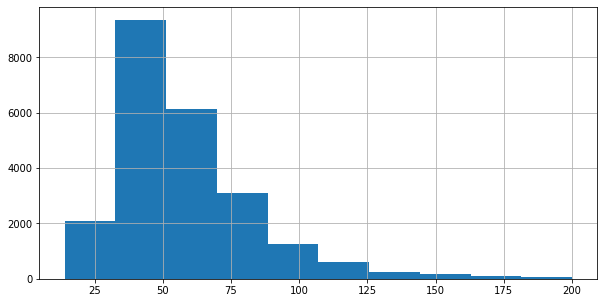

In [56]:
data['total_area'].hist(figsize=(10, 5));

**общая площадь**: средняя площадь продаваемых квартир 40-60 м кв., преимущественно в продаже находились квартиры площадью до 90 м кв;

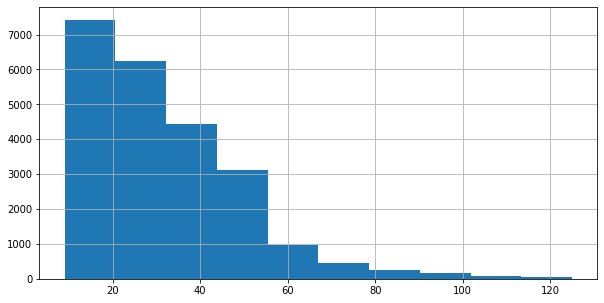

In [57]:
data['living_area'].hist(figsize=(10, 5));

**жилая площадь**: средняя жилая площадь 25 м кв., преимущественно в продаже находились квартиры с жилой площадью до 55 м кв;

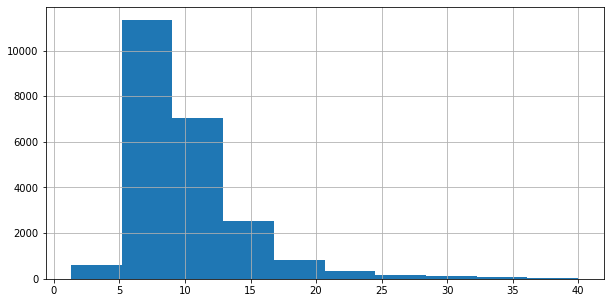

In [58]:
data['kitchen_area'].hist(figsize=(10, 5));

**площадь кухни**: средняя площадь кухни 8-13 м кв., преимущественно в продаже находились квартиры с жилой площадью до 17 м кв;

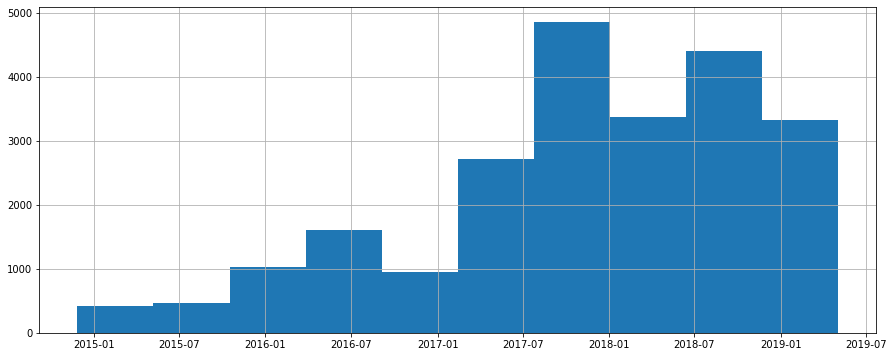

In [59]:
data['first_day_exposition'].hist(figsize=(15, 6));

**дата публикации**: объем предложений на рынке увеличился в 2 раза от года к году.

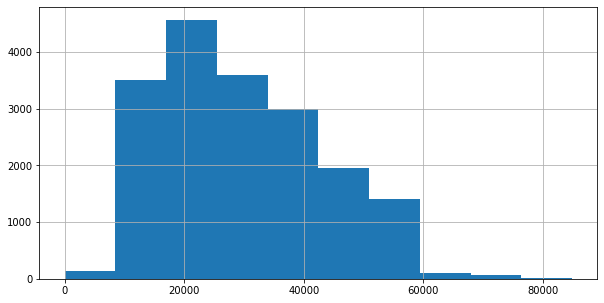

In [60]:
data['airports_nearest'].hist(figsize=(10, 5));

**расстояние до ближайшего аэропорта в метрах**: средняя удаленность квартир 25-30 тыс м

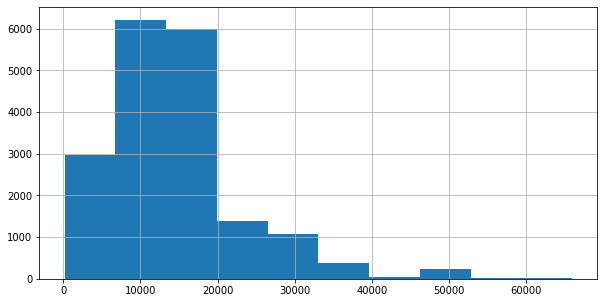

In [61]:
data['cityCenters_nearest'].hist(figsize=(10, 5));

**расстояние до центра города в метрах**: средняя удаленность квартир 10-20 тыс м;

<AxesSubplot:>

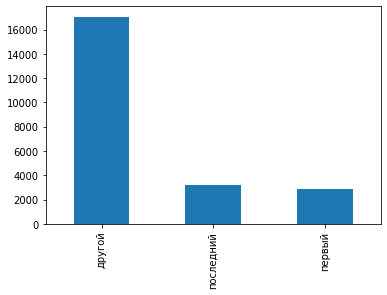

In [62]:
type_of_floor_count = data['type_of_floor'].value_counts()
type_of_floor_count.plot.bar(x = 'type_of_floor', y = type_of_floor_count)

**тип этажа квартиры («первый», «последний», «другой»)**: кол-во предложений по первым и последним этажам в 8 раз меньше, чем других этажей;

**Предварительный анализ полученных данных**:  
- общая площадь: средняя площадь продаваемых квартир 40-60 м кв., преимущественно в продаже находились квартиры площадью до 90 м кв;
- жилая площадь: средняя жилая площадь 25 м кв., преимущественно в продаже находились квартиры с жилой площадью до 55 м кв;
- площадь кухни: средняя площадь кухни 8-13 м кв., преимущественно в продаже находились квартиры с жилой площадью до 17 м кв;
- цена объекта: средняя стоимость квартир 5,9 млн руб
- количество комнат: преимущественно в продаже находились 1-2х комнатные квартиры, но при этом также выделяется сегмент 4х комнатных квартир;
- высота потолков: средняя высота потолков не превышает 3х метров
- этаж квартиры: больше предложений было квартир с 1-го по 5ый этаж, так как достаточно большой объем жилого фонда занимают именно 5-ти этажные дома, но также встречаются квартиры с более высоких этажей - вплотьт до 30, их кол-во плавно снижается по мере увеличения этажа;
- тип этажа квартиры («первый», «последний», «другой»): кол-во предложений по первым и последним этажам в 8 раз меньше, чем других этажей;
- общее количество этажей в доме: большой объем жилого фонда занимают именно 5-ти и 10-ти этажные дома;
- расстояние до центра города в метрах: средняя удаленность квартир 10-20 тыс м;
- расстояние до ближайшего аэропорта в метрах: средняя удаленность квартир 25-30 тыс м;
- расстояние до ближайшего парка в метрах: средняя удаленность до парка 500 м;
- день и месяц публикации объявления: Большая часть публикаций объявлений приходится на будние дни. Декабрь и Январь - сезонные пики по кол-ву объявлений, с мая по август наблюдается более низкий сезон, тем не менее объем объявлений все равно сохраняется.

In [64]:
data['days_exposition'].sort_values().median()

95.0

In [65]:
data['days_exposition'].mean()

179.82295457944858

Средняя скорость продажи квартиры составляет полгода - большая часть квартир продается в течении этого периода.  

Относительно быстрой можно считать продажу квартиры за период до 50 дней.
При этом есть квартиры, которые подолгу не находят покупателя - объявления остаются активны до 4х лет.

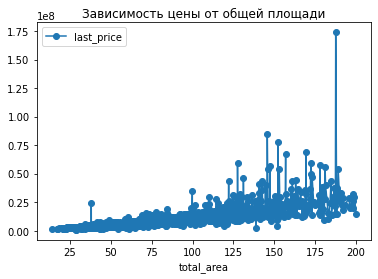

In [66]:
data.pivot_table(index='total_area', values='last_price', aggfunc='median').\
plot(style='o-', title='Зависимость цены от общей площади');

In [67]:
data['total_area'].corr(data['last_price'])

0.6556729607825406

Общая площадь до определенного метража имеет прямое влияние на рост стоимости объекта: до метража 150 м кв. Однако, по мере роста площади, стоимость становится нестабильной, вероятно, влияние дополнительных факторов.

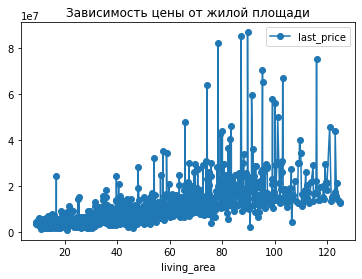

In [68]:
data.pivot_table(index='living_area', values='last_price', aggfunc='median').\
plot(style='o-', title='Зависимость цены от жилой площади');

In [69]:
data['living_area'].corr(data['last_price'])

0.5363845868934528

Жилая площадь до 70 м кв влияет на рост стоимости объекта. Однако, по мере роста площади, стоимость становится нестабильной так как на ее формирование накладываются дополнительные факторы.

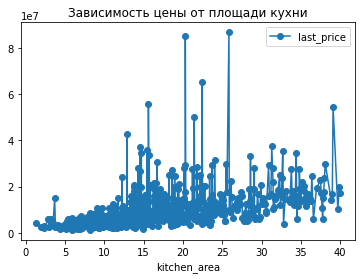

In [70]:
data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median').\
plot(style='o-', title='Зависимость цены от площади кухни');

In [71]:
data['kitchen_area'].corr(data['last_price'])

0.4921394513962507

Площадь кухни имеет более низкую корреляцию на рост стоимости, вероятней влияние общей и жилой площадей.

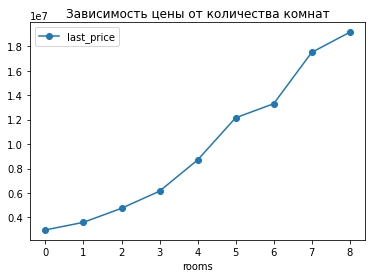

In [72]:
data.pivot_table(index='rooms', values='last_price', aggfunc='median').\
plot(style='o-', title='Зависимость цены от количества комнат');

In [73]:
data['rooms'].corr(data['last_price'])

0.37987980891204254

Количество комнат также напрямую влияет на рост стоимости, причем, начиная с 4х комнатных квартир каждая комната добавляет почти 50% к стоимости объекта.

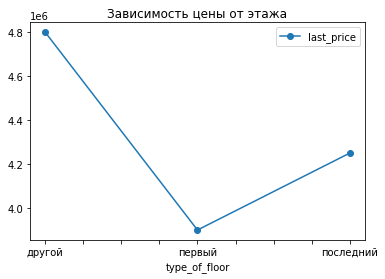

In [75]:
data.pivot_table(index='type_of_floor', values='last_price', aggfunc='median').\
plot(style='o-', title='Зависимость цены от этажа');

Этаж, на котором расположена квартира (первый, последний, другой) существенно влияет на стоимость: первый этаж наиболее низкий по стоимости.

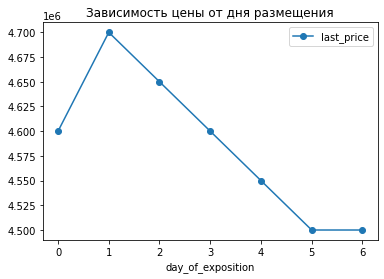

In [76]:
data.pivot_table(index='day_of_exposition', values='last_price', aggfunc='median').\
plot(style='o-', title='Зависимость цены от дня размещения');

В начале недели публикуются объявления с наиболее высокой стоимостью, ближе к концу недели ниже.

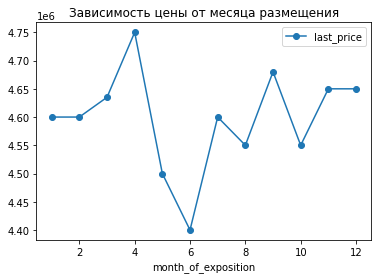

In [77]:
data.pivot_table(index='month_of_exposition', values='last_price', aggfunc='median').\
plot(style='o-', title='Зависимость цены от месяца размещения');

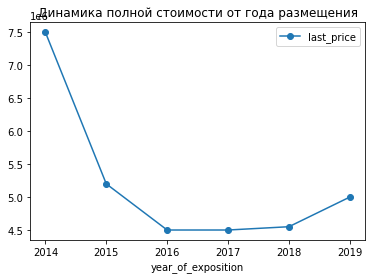

In [78]:
data.pivot_table(index='year_of_exposition', values='last_price', aggfunc='median').\
plot(style='o-', title='Динамика полной стоимости от года размещения');

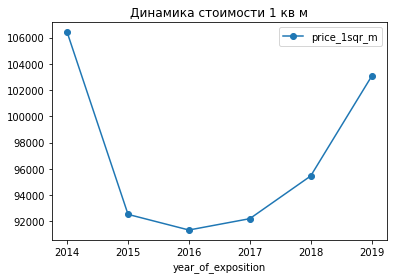

In [79]:
data.pivot_table(index='year_of_exposition', values='price_1sqr_m', aggfunc='median').\
plot(style='o-', title='Динамика стоимости 1 кв м');

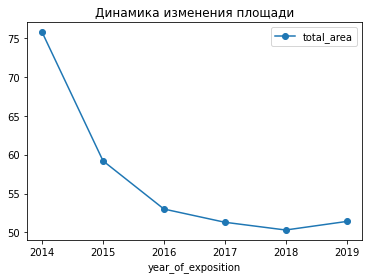

In [80]:
data.pivot_table(index='year_of_exposition', values='total_area', aggfunc='median').\
plot(style='o-', title='Динамика изменения площади');

С 2014 по 2017 г наблюдалось снижение общей стоимости недвижимости, но с 2018г цены начали расти. 

При этом заметен рост цена за 1 кв м. с 2018г при сокращающейся общей площади квартир на рынке.

Итого в результате анализа влияния различных факторов на стоимость объекта, можно прийти к следующим выводам:

- Площадь до определенного метража имеет прямое влияние на рост стоимости объекта (общая площадь до метража 150 м кв, жилая площадь до 70 м кв, площадь кухни до 13 м кв). Однако, по мере роста площади, стоимость становится нестабильной так как на ее формирование накладываются дополнительные факторы. 

- Количество комнат также напрямую влияет на рост стоимости, причем, начиная с 4х комнатных квартир каждая комната добавляет почти 50% к стоимости объекта.

- этаж, на котором расположена квартира (первый, последний, другой) существенно влияет на стоимость: первый этаж наиболее низкий по стоимости.

- дата размещения: день недели, месяц, год. В начале недели публикуются объявления с наиболее высокой стоимостью, ближе к концу недели ниже, но данная зависимость неоднозначна. В течении года наблюдается сезональность: летом цены на жилье падают. Также годы публикаци объявлений влияют на стоимость в соответствии с положением на рынке недвижимости и экономики в целом: с 2019г намечается динамика на рост, при этом площадь квартир от года к году сокращается.

In [81]:
top_geo = data['locality_name'].value_counts().head(10)
top_geo.head(10)

Санкт-Петербург      15262
Мурино                 552
поселок Шушары         439
Всеволожск             396
Пушкин                 358
Колпино                336
поселок Парголово      326
Гатчина                307
деревня Кудрово        287
Выборг                 237
Name: locality_name, dtype: int64

In [82]:
top_geo = data.groupby('locality_name')['last_price'].mean()
top_geo = top_geo.sort_values(ascending=False).head(11)
display (top_geo)

locality_name
поселок Репино             1.253333e+07
поселок Александровская    8.725000e+06
Санкт-Петербург            7.158664e+06
не указан                  6.528980e+06
Сестрорецк                 6.290028e+06
Зеленогорск                6.288338e+06
Пушкин                     5.983148e+06
Павловск                   4.929711e+06
деревня Заневка            4.781500e+06
деревня Мистолово          4.770114e+06
деревня Глинка             4.750000e+06
Name: last_price, dtype: float64

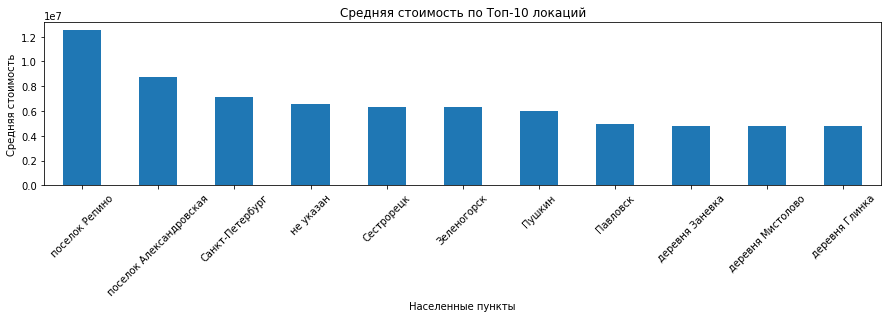

In [83]:
top_geo.plot(kind = 'bar', figsize = (15,3), title = 'Средняя стоимость по Топ-10 локаций',\
             xlabel='Населенные пункты', ylabel='Средняя стоимость', rot=45);


Наиболее высокая средняя стоимость за 1 кв м в 3х населенный пунктах: Поселк Репино, Зеленогорск, Санкт-Петербург. Самая низкая стоимость в деревне Кудрово.

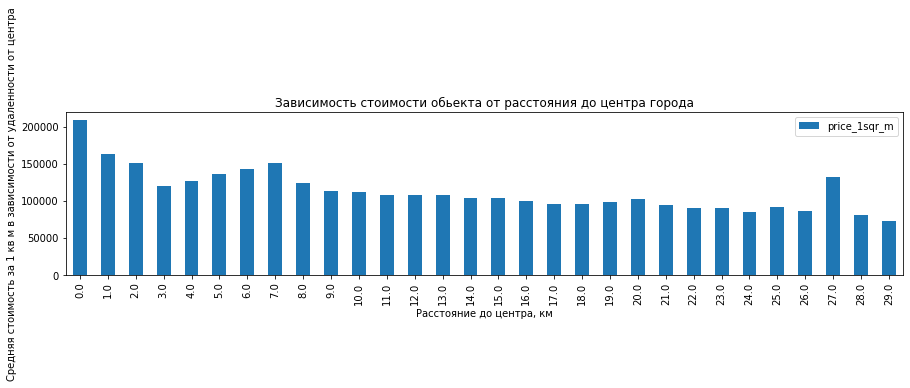

In [84]:
spb_data = data.query('locality_name == "Санкт-Петербург"')
spb_data = spb_data.pivot_table(index='cityCenters_km', values='price_1sqr_m', aggfunc='mean')

spb_data.plot(kind = 'bar', figsize = (15,3), title = 'Зависимость стоимости обьекта от расстояния до центра города',\
              xlabel='Расстояние до центра, км', ylabel='Средняя стоимость за 1 кв м в зависимости от удаленности от центра');


In [85]:
display(spb_data)

,price_1sqr_m
cityCenters_km,
0.0,208887.095238
1.0,162784.708333
2.0,150599.427007
3.0,120823.401813
4.0,127468.077280
5.0,136330.586288
6.0,142758.129433
7.0,151392.772727
8.0,124197.041451


Для квартир в Санкт-Петербурге также можно выделить зависимость стоимости 1 кв м жилья от удаленности от центра города: 
квартиры ближе к центру имеют более высокую стоимость за 1 кв м. 

### Общий вывод

Была проведена предобработка данных по всем параметрам базы данных с целью исключить дубликаты, пропуски и прочие ошибки:



Анализ данных выявил несколько факторов, влияющих на формирование стоимости объектов жилья:
- площадь помещения
- период публикации объявления
- кол-во комнат
- тип этажа квартиры
    
*Площадь помещения*:


    Площадь до определенного метража имеет прямое влияние на рост стоимости объекта (общая площадь до метража 150 м кв, жилая площадь до 70 м кв, площадь кухни до 13 м кв). Однако, по мере роста площади, стоимость становится нестабильной так как на ее формирование накладываются дополнительные факторы.

*Период публикации объявления*:


    Декабрь и Январь - сезонные пики по кол-ву объявлений, с мая по август наблюдается более низкий сезон - цены на жилья     снижаются.
    В начале недели публикуются объявления с наиболее высокой стоимостью. 
    Также годы публикаци объявлений влияют на стоимость в соответствии с положением на рынке недвижимости и экономики в целом: с 2019г намечается динамика на рост, при этом площадь квартир от года к году сокращается.
        
*Кол-во комнат*:


    Количество комнат также напрямую влияет на рост стоимости, причем, начиная с 4х комнатных квартир каждая комната добавляет почти 50% к стоимости объекта.

*Тип этажа квартиры*:


    Этаж, на котором расположена квартира (первый, последний, другой) существенно влияет на стоимость: первый этаж наиболее низкий по стоимости.

   
Для квартир в Санкт-Петербурге также можно выделить зависимость стоимости 1 кв м жилья от удаленности от центра города: 
квартиры ближе к центру имеют более высокую стоимость за 1 кв м. 
